# AICTE Internship
# EV Vehicle Charge Demand Prediction Week 1 Project
# Name: Kavya Chopade

In [64]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Loading Electric Vehicle Dataset
df=pd.read_csv('Electric_Vehicle_Population_By_County.csv')

In [68]:
# Checking first 10 rows of the dataset
df.head(10)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19
5,May 31 2018,Maui,HI,Passenger,1,0,1,59,60,1.67
6,November 30 2017,Northampton,PA,Passenger,0,1,1,66,67,1.49
7,March 31 2018,Nassau,NY,Passenger,1,0,1,37,38,2.63
8,March 31 2020,DeKalb,IN,Passenger,1,0,1,1,2,50.00
9,January 31 2019,Columbia,WA,Truck,0,0,0,"1,529","1,529",0.00


In [70]:
# Checking rows and columns of the data
df.shape

(20819, 10)

In [72]:
# Here we are checking the null values and datatype present in every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [74]:
# Here we can see the number of null values present in the every column
df.isnull().sum()

Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64

In [76]:
# Here firstly we are converting the alpha-numeric Date to fully numeric
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df=df[df['Date'].notnull()]

# Then we are filling the null spaces in County and State with NA
df['County']=df['County'].fillna('NA')
df['State']=df['State'].fillna('NA')
print('Missing value after fill:')
print(df[['County','State']].isnull().sum())

df.head(10)

Missing value after fill:
County    0
State     0
dtype: int64


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,2022-06-30,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19
5,2018-05-31,Maui,HI,Passenger,1,0,1,59,60,1.67
6,2017-11-30,Northampton,PA,Passenger,0,1,1,66,67,1.49
7,2018-03-31,Nassau,NY,Passenger,1,0,1,37,38,2.63
8,2020-03-31,DeKalb,IN,Passenger,1,0,1,1,2,50.00
9,2019-01-31,Columbia,WA,Truck,0,0,0,"1,529","1,529",0.00


In [78]:
# Here we can find all the statistical data present in the dataset
# After analyzing the statistics we can notice that the difference between mean value and max value in Percent Electric Vehicles is huge
# This means there might exist an outlier
df.describe()

,Date,Percent Electric Vehicles
count,20819,20819.000000
mean,2020-11-13 19:57:00.855949056,4.139216
min,2017-01-31 00:00:00,0.000000
25%,2019-03-31 00:00:00,0.390000
50%,2020-12-31 00:00:00,1.220000
75%,2022-07-31 00:00:00,2.995000
max,2024-02-29 00:00:00,100.000000
std,NaN,11.055350


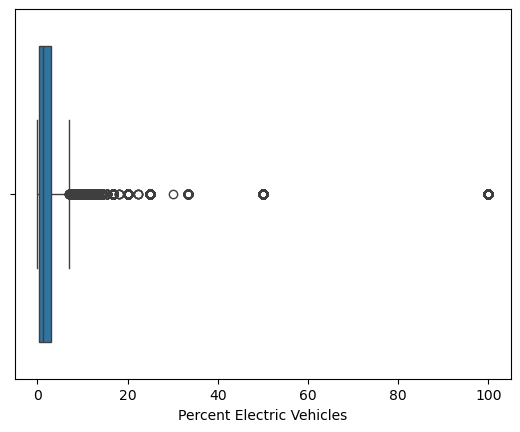

In [80]:
# Using Boxplot to check for outliers
sns.boxplot(x='Percent Electric Vehicles',data=df)
plt.show()

C:\Users\chopa\AppData\Local\Temp\ipykernel_14320\3194856668.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Percent Electric Vehicles'])


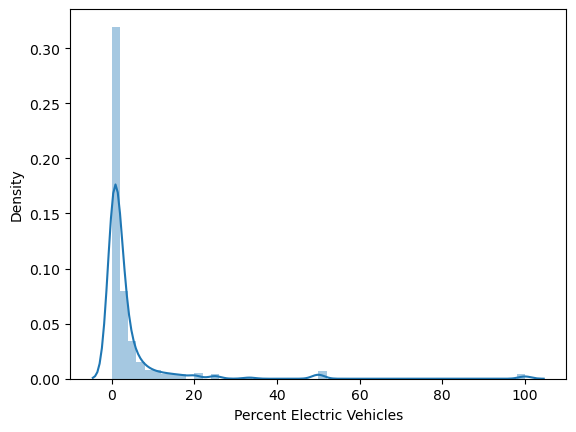

In [82]:
# Using a different plot i.e. Distplot to check outlier 
sns.distplot(df['Percent Electric Vehicles'])
plt.show()

In [84]:
# Here we are using IQR(InterQuartile Range) method to detect the range and remove the outliers
q1=df['Percent Electric Vehicles'].quantile(0.25)
q3=df['Percent Electric Vehicles'].quantile(0.75)

IQR=q3-q1

min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
print('Minimum Range:',min_range)
print('Maximum Range:',max_range)

outliers=df[(df['Percent Electric Vehicles']<min_range) | (df['Percent Electric Vehicles']>max_range)]
print('Number of outliers present in Percent Electric Vehicles:',outliers.shape[0])

Minimum Range: -3.5174999999999996
Maximum Range: 6.9025
Number of outliers present in Percent Electric Vehicles: 2476


In [86]:
# Cap the outliers - it keeps all the data while reducing the skew from extreme values.

df['Percent Electric Vehicles'] = np.where(df['Percent Electric Vehicles'] > max_range, max_range,
                                 np.where(df['Percent Electric Vehicles'] < min_range, min_range, df['Percent Electric Vehicles']))

# Identify outliers
outliers = df[(df['Percent Electric Vehicles'] < min_range) | (df['Percent Electric Vehicles'] > max_range)]
print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])

Number of outliers in 'Percent Electric Vehicles': 0


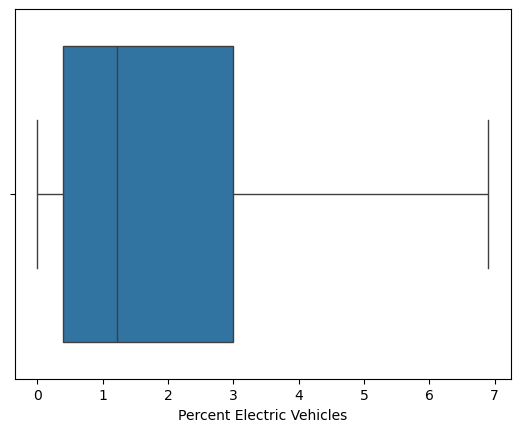

In [88]:
# Plotting new df after removing the outliers
sns.boxplot(x='Percent Electric Vehicles',data=df)
plt.show()